In [1]:
%matplotlib notebook

In [2]:
import os
os.getcwd()

'H:\\test\\Stock\\src'

In [3]:
# import packages
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.dates as mdates
from matplotlib import rcParams

from collections import deque
import pandas as pd
import numpy as np
import random
# my packages
from get_stock_data import data_gan

In [4]:
plt.rcParams['animation.ffmpeg_path'] ='H:/LG/ffmpeg-20200628-4cfcfb3-win64-static/bin/ffmpeg.exe'
FFwriter=animation.FFMpegWriter(fps=10, extra_args=['-vcodec', 'libx264'])

<IPython.core.display.Javascript object>


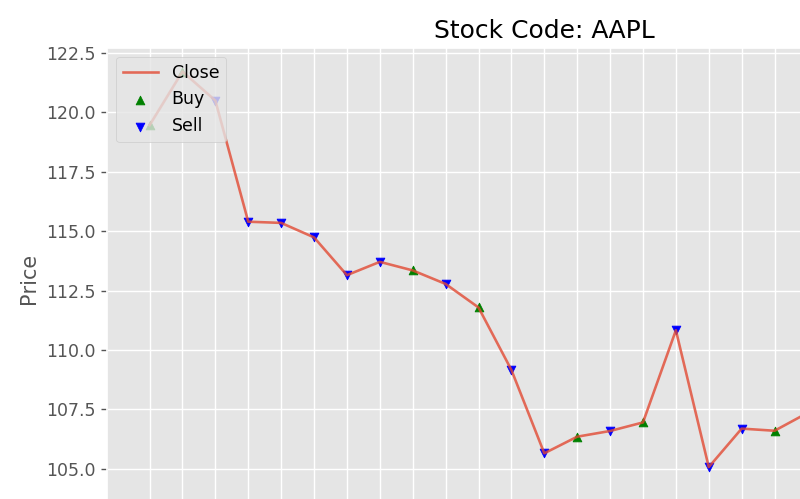

In [5]:
plt.style.use('ggplot')
plt.ion()

fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
ax.set_xlim(0,31)

identifier = 'AAPL'

def animate(i):
    data = pd.read_csv('H:/test/Stock/raw_data/AAPL.csv')
    num = len(data)
    
    date_deque = deque(maxlen=25)
    close_deque = deque(maxlen=25)
    signal_deque = deque(maxlen=25)

    dates = data['Date'].values
    closes = data['Close'].values
    opens = data['Open'].values
    highes = data['High'].values
    lows = data['Low'].values
    volumns = data['Volume'].values

    for i in dates:
        date_deque.append(i)
    for i in closes:
        close_deque.append(i)
    for i in lows:
        signal_deque.append(i)
    
    deque_df = pd.DataFrame(list(zip(date_deque, close_deque, signal_deque)), columns =['Date', 'Close', 'Low']) 
    deque_df['Buy'] = deque_df['Low'].apply(lambda x : random.randint(0, 2))
    
    plt.cla()
    plt.ylabel('Price')
    plt.title('Stock Code: {}'.format(identifier))
    
    #plot Close
    plt.plot(deque_df['Date'].values, deque_df['Close'].values, alpha=0.8, label="Close")
    
    #plot signal
    
    plt.scatter(deque_df.loc[deque_df['Buy'] ==1 , 'Date'].values,\
                deque_df.loc[deque_df['Buy'] ==1, 'Close'].values,\
                label='Buy', color='green', s=25, marker="^")
    
    plt.scatter(deque_df.loc[deque_df['Buy'] ==0 , 'Date'].values,\
                deque_df.loc[deque_df['Buy'] ==0, 'Close'].values,\
                label='Sell', color='blue', s=25, marker="v")
    
    
    
    plt.xticks(rotation=45)
    
    plt.legend(loc='upper left')
    plt.tight_layout()



In [6]:
ani = animation.FuncAnimation(plt.gcf(), animate, interval=1000)
plt.show()

In [7]:
ani.save('../result/{}.gif'.format(identifier), writer='imagemagick', fps=15)